1. Data Prep

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data_cleaned_stem_v4.csv' )

In [4]:
df.head()

,is_spoiler_label,full_summary_clean
0,1,classic piec unforgett film make oscar year sh...
1,1,simpli amaz best film shawshank redempt withou...
2,1,best stori ever told film believ film best sto...
3,1,busi die busi live ye spoiler film emot impact...
4,1,great stori wondrous told act heart extraordin...


In [5]:
df.shape


(573913, 2)

In [8]:
df_sample = df.sample(frac = 0.1) 

In [9]:
df_sample['is_spoiler_label'].value_counts()

0    42178
1    15213
Name: is_spoiler_label, dtype: int64

2. Model

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( df_sample['full_summary_clean'], df_sample['is_spoiler_label'], test_size=0.2, random_state=42)

In [11]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Create Pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nb', MultinomialNB()),
])

# Set parameters to search
parameters = {
    'tfidf__ngram_range': ((1,1), (1,2)),
    'tfidf__min_df': (0.1, 0.2),
    'tfidf__max_df': (0.75, 1),
    'nb__alpha': (1,)}

# Perform grid search on pipeline
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, 
                           verbose=1, scoring = "recall", 
                           refit=True, cv=5)

grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  5.8min finished


CPU times: user 9.2 s, sys: 939 ms, total: 10.1 s
Wall time: 5min 50s


In [12]:
grid_search.best_params_

{'nb__alpha': 1,
 'tfidf__max_df': 0.75,
 'tfidf__min_df': 0.1,
 'tfidf__ngram_range': (1, 1)}

In [13]:
grid_search.best_estimator_

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.75, max_features=None,
                                 min_df=0.1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('nb',
                 MultinomialNB(alpha=1, class_prior=None, fit_prior=True))],
         verbose=False)

In [14]:
best_pipe = grid_search.best_estimator_

In [15]:
vectorizer = best_pipe.named_steps['tfidf']


In [16]:
vectorizer.get_feature_names()


['act',
 'action',
 'actor',
 'actual',
 'almost',
 'also',
 'alway',
 'amaz',
 'anoth',
 'anyth',
 'around',
 'audienc',
 'away',
 'back',
 'bad',
 'beauti',
 'becom',
 'begin',
 'believ',
 'best',
 'better',
 'big',
 'bit',
 'book',
 'cast',
 'charact',
 'come',
 'comedi',
 'complet',
 'could',
 'day',
 'differ',
 'direct',
 'director',
 'disappoint',
 'done',
 'effect',
 'emot',
 'end',
 'enjoy',
 'enough',
 'entertain',
 'especi',
 'even',
 'ever',
 'everi',
 'everyon',
 'everyth',
 'excel',
 'expect',
 'fact',
 'fan',
 'far',
 'feel',
 'film',
 'final',
 'find',
 'first',
 'fun',
 'funni',
 'get',
 'give',
 'go',
 'good',
 'got',
 'great',
 'guy',
 'happen',
 'hard',
 'help',
 'hope',
 'hour',
 'howev',
 'interest',
 'job',
 'keep',
 'kill',
 'kind',
 'know',
 'last',
 'least',
 'let',
 'life',
 'like',
 'line',
 'littl',
 'live',
 'long',
 'look',
 'lot',
 'love',
 'made',
 'make',
 'man',
 'mani',
 'may',
 'mean',
 'mind',
 'minut',
 'moment',
 'much',
 'music',
 'must',
 'need'

In [17]:
grid_search.best_score_

0.0

In [18]:
grid_search.cv_results_

{'mean_fit_time': array([ 6.06465816, 28.02891989,  5.65014653, 27.78625708,  5.30392408,
        24.22546902,  5.34927692, 22.24170589]),
 'mean_score_time': array([1.35227113, 2.47676511, 1.16689992, 2.39106402, 0.        ,
        0.        , 0.        , 0.        ]),
 'mean_test_score': array([ 0.,  0.,  0.,  0., nan, nan, nan, nan]),
 'param_nb__alpha': masked_array(data=[1, 1, 1, 1, 1, 1, 1, 1],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_tfidf__max_df': masked_array(data=[0.75, 0.75, 0.75, 0.75, 1, 1, 1, 1],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_tfidf__min_df': masked_array(data=[0.1, 0.1, 0.2, 0.2, 0.1, 0.1, 0.2, 0.2],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_tfidf__ngram_range': masked_array(da

In [19]:
y_predict = grid_search.predict(X_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [20]:
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

print(classification_report(y_test, y_predict))




              precision    recall  f1-score   support

           0       0.73      1.00      0.85      8411
           1       1.00      0.00      0.00      3068

    accuracy                           0.73     11479
   macro avg       0.87      0.50      0.42     11479
weighted avg       0.80      0.73      0.62     11479



[[8411    0]
 [3067    1]]


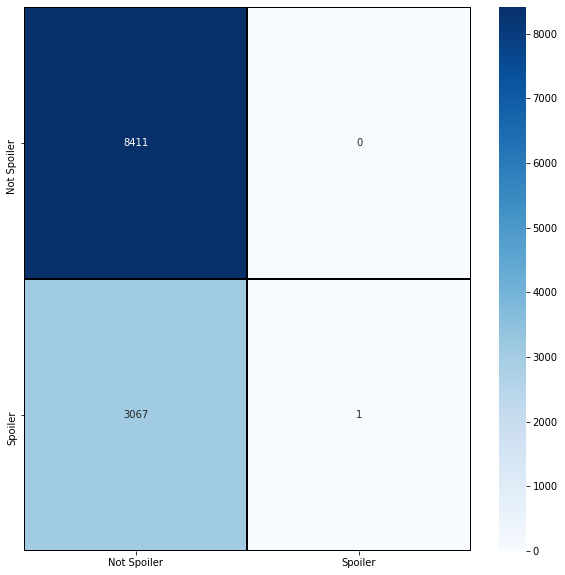

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

print(confusion_matrix(y_test, y_predict))
cm = confusion_matrix(y_test, y_predict)
cm = pd.DataFrame(cm , index = ['Not Spoiler','Spoiler'] , columns = ['Not Spoiler','Spoiler'])
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Not Spoiler','Spoiler'] , yticklabels = ['Not Spoiler','Spoiler'])